In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_temps = session.query(Measurement.tobs).filter(Measurement.date.like('%-06-%'))

for temp in june_temps:
    print(temp)

(78.0,)
(76.0,)
(78.0,)
(76.0,)
(77.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(77.0,)
(77.0,)
(82.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(76.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(73.0,)
(70.0,)
(76.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(77.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(75.0,)
(76.0,)
(76.0,)
(77.0,)
(78.0,)
(76.0,)
(77.0,)
(75.0,)
(77.0,)
(76.0,)
(76.0,)
(75.0,)
(77.0,)
(77.0,)
(76.0,)
(78.0,)
(77.0,)
(76.0,)
(77.0,)
(76.0,)
(76.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(77.0,)
(77.0,)
(76.0,)
(75.0,)
(76.0,)
(76.0,)
(77.0,)
(76.0,)
(73.0,)
(73.0,)
(75.0,)
(77.0,)
(76.0,)
(77.0,)
(79.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(79.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(76.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(73.0,)
(76.0,)
(77.0,)
(75.0,)
(76.0,)
(74.0,)
(75.0,)
(77.0,)
(76.0,)
(77.0,)
(78.0,)
(79.0,)
(77.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(79.0,)


In [5]:
# Convert the June temperatures to a list.
jun_temps = []

jun_temps = [ jt[0] for jt in june_temps ]

jun_temps

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [6]:
# Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

june_temps_df = pd.DataFrame(jun_temps)

june_temps_df

,0
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

december_temps = session.query(Measurement.tobs).filter(Measurement.date.like('%-12-%'))

for temp in december_temps:
    print(temp)

(76.0,)
(74.0,)
(74.0,)
(64.0,)
(64.0,)
(67.0,)
(77.0,)
(66.0,)
(69.0,)
(68.0,)
(68.0,)
(71.0,)
(74.0,)
(67.0,)
(66.0,)
(69.0,)
(71.0,)
(70.0,)
(70.0,)
(74.0,)
(74.0,)
(71.0,)
(75.0,)
(75.0,)
(72.0,)
(69.0,)
(68.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(73.0,)
(73.0,)
(71.0,)
(73.0,)
(73.0,)
(77.0,)
(72.0,)
(71.0,)
(73.0,)
(70.0,)
(73.0,)
(69.0,)
(74.0,)
(72.0,)
(71.0,)
(72.0,)
(72.0,)
(70.0,)
(73.0,)
(73.0,)
(72.0,)
(73.0,)
(73.0,)
(72.0,)
(63.0,)
(65.0,)
(71.0,)
(76.0,)
(70.0,)
(76.0,)
(69.0,)
(69.0,)
(69.0,)
(74.0,)
(76.0,)
(74.0,)
(73.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(73.0,)
(74.0,)
(74.0,)
(71.0,)
(73.0,)
(72.0,)
(64.0,)
(66.0,)
(73.0,)
(72.0,)
(65.0,)
(64.0,)
(69.0,)
(68.0,)
(77.0,)
(71.0,)
(71.0,)
(69.0,)
(68.0,)
(68.0,)
(69.0,)
(70.0,)
(72.0,)
(76.0,)
(75.0,)
(69.0,)
(71.0,)
(71.0,)
(71.0,)
(68.0,)
(65.0,)
(70.0,)
(69.0,)
(69.0,)
(71.0,)
(67.0,)
(73.0,)
(74.0,)
(73.0,)
(67.0,)
(74.0,)
(75.0,)
(75.0,)
(74.0,)
(67.0,)
(73.0,)
(73.0,)
(71.0,)
(72.0,)
(71.0,)
(68.0,)
(65.0,)
(69.0,)


In [9]:
# Convert the December temperatures to a list.

dec_temps = []

dec_temps = [ dt[0] for dt in december_temps ]

dec_temps

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [10]:
# Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(dec_temps)

december_temps_df

,0
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [11]:
# Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Recommendations ###

0    float64
1    float64
dtype: object

june_tp = 1700
june_pcrp = 1700


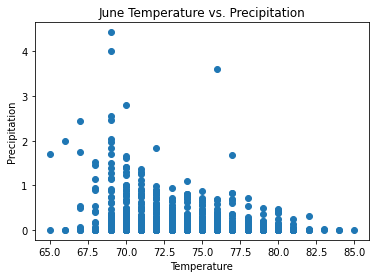

In [14]:
# Import dependencies
import matplotlib.pyplot as plt

# Write a query that filters the Measurement table to retrieve the temperatures and precipitation for the month of June.

june_temp_precip = session.query(Measurement.tobs, Measurement.prcp).filter(Measurement.date.like('%-06-%'))

#for temp in june_temp_precip:
#    print(temp)
    
# Convert the query results into a DataFrame
june_tp_df = pd.DataFrame(june_temp_precip)

print(june_tp_df.dtypes)
print()

# Give the columns a meaningful label
june_tp_df.rename(columns={ june_tp_df.columns[0]: "temp",  june_tp_df.columns[1]: "prcp"}, inplace = True)

# Assign variable to DataFrame columns
june_tp = june_tp_df['temp']
june_prcp = june_tp_df['prcp']

print(f'june_tp = {len(june_tp)}')
print(f'june_pcrp = {len(june_prcp)}')
    
# Create a scatter plot of the x and y values.
plt.scatter(june_tp_df['temp'],june_tp_df['prcp'])
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('June Temperature vs. Precipitation')
plt.show()

0    float64
1    float64
dtype: object

dec_tp = 1517
dec_pcrp = 1517


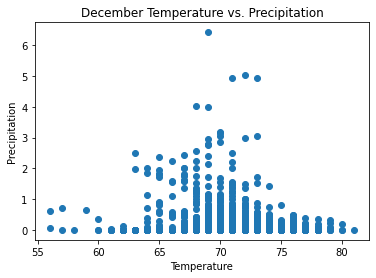

In [15]:
# Write a query that filters the Measurement table to retrieve the temperatures and precipitation for the month of December.

dec_temp_precip = session.query(Measurement.tobs, Measurement.prcp).filter(Measurement.date.like('%-12-%'))

#for temp in dec_temp_precip:
#    print(temp)
    
# Convert the query results into a DataFrame
dec_tp_df = pd.DataFrame(dec_temp_precip)

print(dec_tp_df.dtypes)
print()

# Give the columns a meaningful label
dec_tp_df.rename(columns={ dec_tp_df.columns[0]: "temp",  dec_tp_df.columns[1]: "prcp"}, inplace = True)

# Assign variable to DataFrame columns
dec_tp = dec_tp_df['temp']
dec_prcp = dec_tp_df['prcp']

print(f'dec_tp = {len(dec_tp)}')
print(f'dec_pcrp = {len(dec_prcp)}')
    
# Create a scatter plot of the x and y values.
plt.scatter(dec_tp_df['temp'],dec_tp_df['prcp'])
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('December Temperature vs. Precipitation')
plt.show()